<h1 style="background: linear-gradient(135deg, #FFEDC6,#FFFF33); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-family: 'Georgia', serif; font-weight: bold; text-align: center; color: blue;">World Happiness Report Project :)</h1>

## <font color="blue"><em> Project Description</em></font>

The "World Happiness Report Project" is an endeavor to analyze and predict the happiness scores of various countries based on a range of socio-economic and well-being factors. The World Happiness Report is a renowned survey that ranks countries by their levels of happiness, providing valuable insights into global well-being and quality of life. This project aims to harness the power of machine learning to predict happiness scores, thereby contributing to our understanding of the factors that influence the overall happiness and satisfaction of a nation's citizens.

## <font color = "blue"><em>Project Objective</em></font>

1. Data Collection
2. Data Exploration
3. Data Preprocessing
4. Machine Learning
   - Model Training & Evaluation
   - Model Interpretation
5. Feature Importance
6. Conclusion

### <font color = "Orange">1.Data Collection</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
data.tail(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [5]:
data_copy = data.copy()
data_copy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### <font color="orange">2.Data Exploration</font>

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The provided summary statistics offer valuable insights into the dataset. Here are some key observations based on the statistics:

- Happiness Rank: The dataset contains information for 158 countries, with ranks ranging from 1 (highest happiness) to 158 (lowest happiness).
- Happiness Score: The average happiness score across all countries is approximately 5.38, with a minimum score of 2.839 and a maximum score of 7.587.
- Standard Error: The standard error of the happiness scores is relatively small, with a mean of approximately 0.048.
- Economy (GDP per Capita): The mean GDP per capita is around 0.846, with a minimum value of 0 and a maximum of approximately 1.690.
- Family: The family support factor (mean of around 0.991) plays a significant role in happiness scores, with a minimum value of 0 and a maximum of approximately 1.402.
- Health (Life Expectancy): The average life expectancy is approximately 0.630, with a minimum value of 0 and a maximum of approximately 1.025.
- Freedom: The freedom to make life choices (mean of around 0.429) varies across countries, with a minimum value of 0 and a maximum of approximately 0.670.
- Trust (Government Corruption): Trust in government and perceptions of corruption (mean of around 0.143) also varies, with a minimum value of 0 and a maximum of approximately 0.552.
- Generosity: Generosity (mean of approximately 0.237) is a factor in happiness scores, with values ranging from 0 to 0.796.
- Dystopia Residual: The Dystopia Residual, which serves as a benchmark for comparison, has an average value of approximately 2.099.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

These points summarize the data structure and characteristics of the dataset:
1. The dataset contains a total of 158 rows and 12 columns.
2. There are no missing values in the dataset, as indicated by "Non-Null Count" for all columns.
3. The dataset consists of the following data types for columns:
- Numerical columns (dtype: float64): 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', and 'Happiness Rank'.
- Categorical/object columns: 'Country' and 'Region'.

### <font color ="orange">3.Data Processing</font>

C:\Users\Mahima\AppData\Local\Temp\ipykernel_14076\924579267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


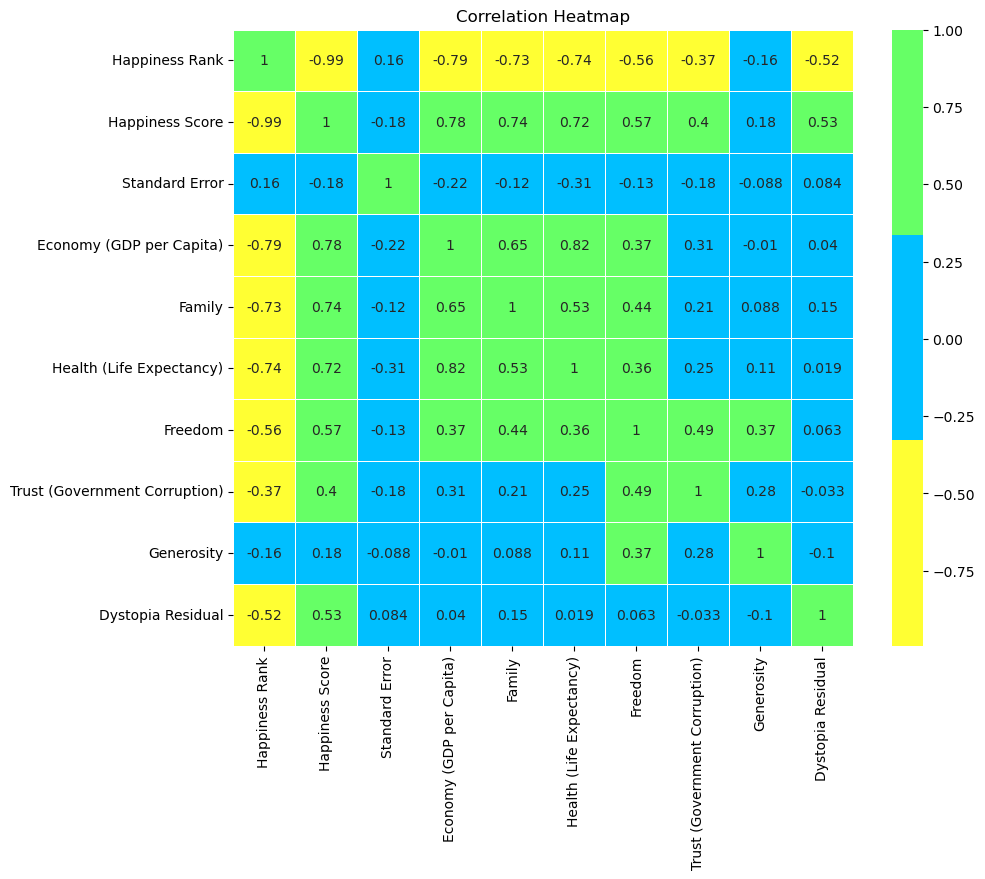

In [8]:
correlation_matrix = data.corr()

colors = ["#FFFF33", "#00BFFF", "#66FF66"]  
plt.figure(figsize=(10, 8))
sns.set_palette(sns.color_palette(colors))
sns.heatmap(correlation_matrix, annot=True, cmap=colors, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Here We can see both positively and negatively correlated features lets understand them:

1. Happiness Score and Dystopia Residual: When a country has a higher happiness score, it's likely to also have a higher level of something called "Dystopia Residual," which could mean that happier countries tend to be more aware of or concerned about certain problems in their society.

2. Family and Health: Countries where people have strong family connections often enjoy better health. This suggests that having a close-knit family can lead to better overall well-being.

3. Freedom and Trust in Government: In countries where people have more personal freedom, they tend to trust their government more. This may be because when people feel free to make their own choices, they may also have more trust in the government.

4. Happiness Rank and Happiness Score: The lower a country's "Happiness Rank" (the closer to the top), the happier the people in that country tend to be. So, a low rank means more happiness.

5. Happiness Rank and Economy: When a country is ranked lower in happiness, it often means that its economy is not doing as well. So, higher-ranked countries tend to have stronger economies.

In simple terms, the data suggests that happier countries are more aware of certain problems, have strong family bonds, and tend to trust their governments more. Additionally, countries with higher happiness ranks tend to be happier and often have stronger economies. These findings give us insights into the factors that influence happiness and well-being.

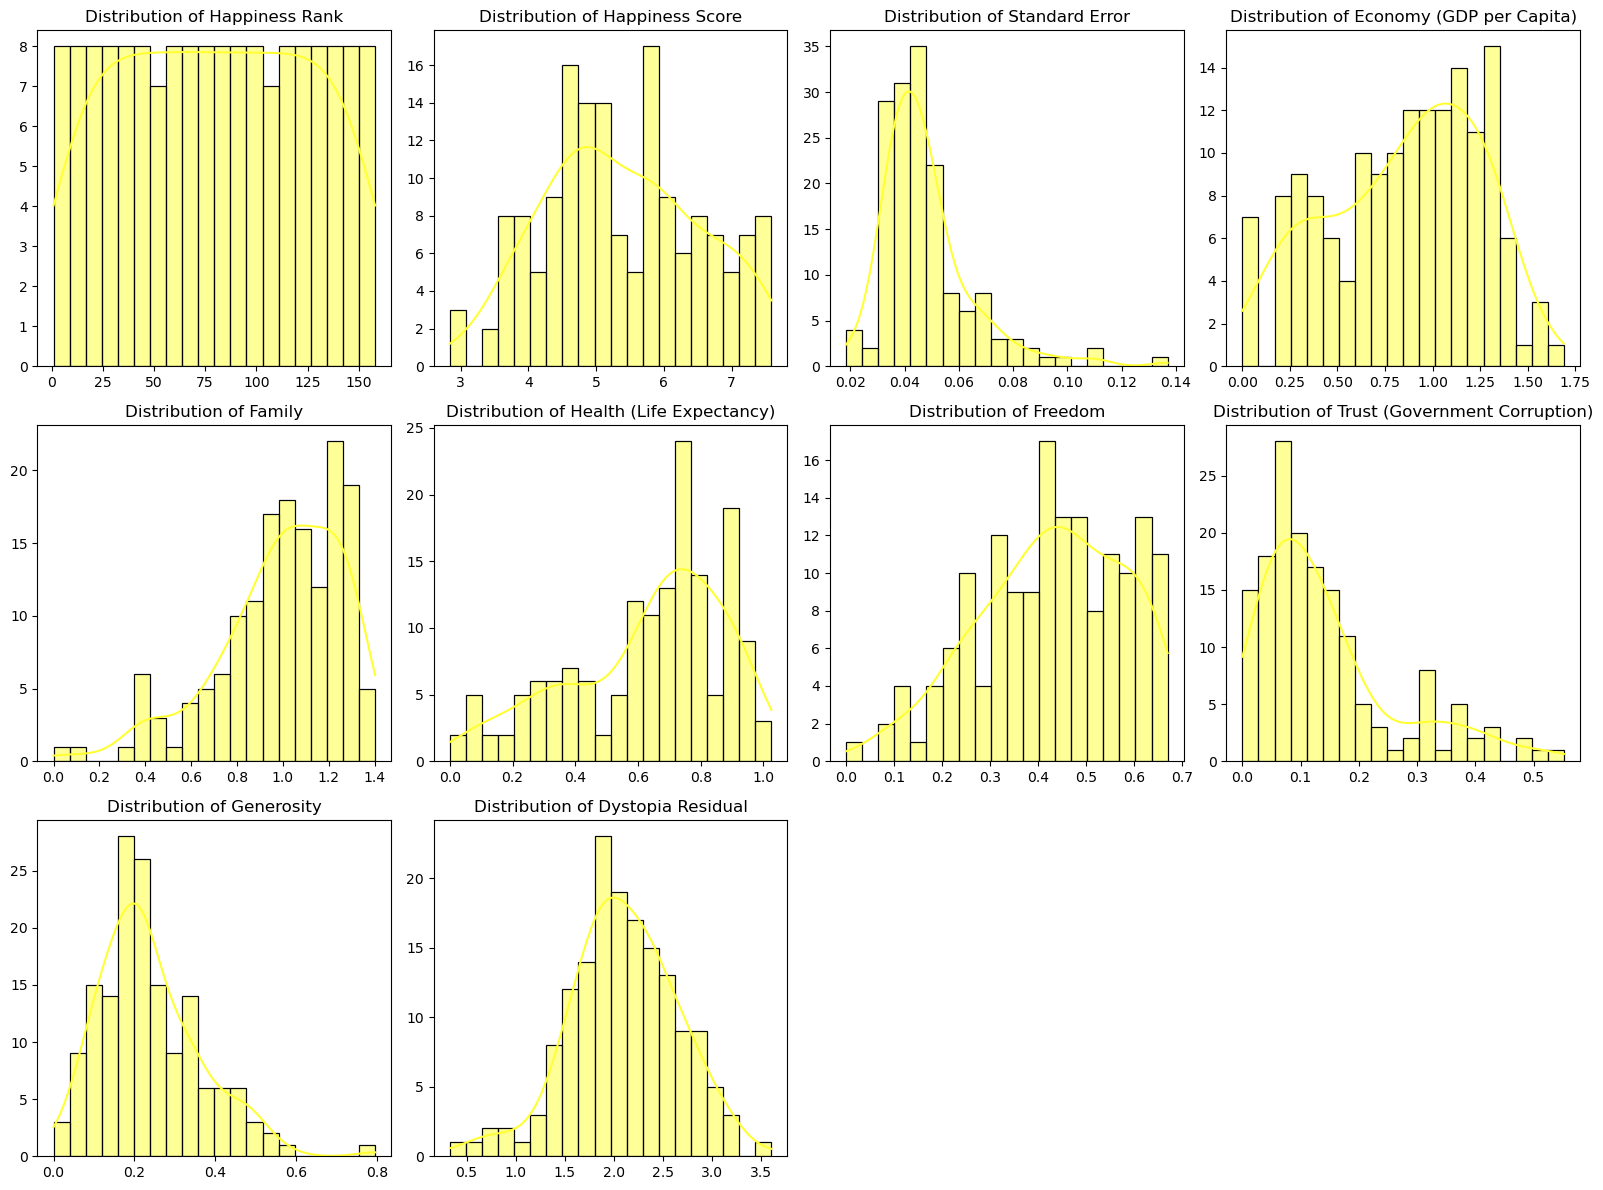

In [9]:
numerical_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [10]:
data.skew()

C:\Users\Mahima\AppData\Local\Temp\ipykernel_14076\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

From above graph and table we can see that Standard Error, Trust, Generosity are right skewed distribution. Where Standard Error is hightly right skewed lets fix it using Log Transform. 

In [11]:
from scipy.stats import boxcox
data['Standard Error']=boxcox(data['Standard Error'],0)

In [12]:
data.skew()

C:\Users\Mahima\AppData\Local\Temp\ipykernel_14076\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Here we can see that skewness for Standard Error is fixed using log tansform (0).

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


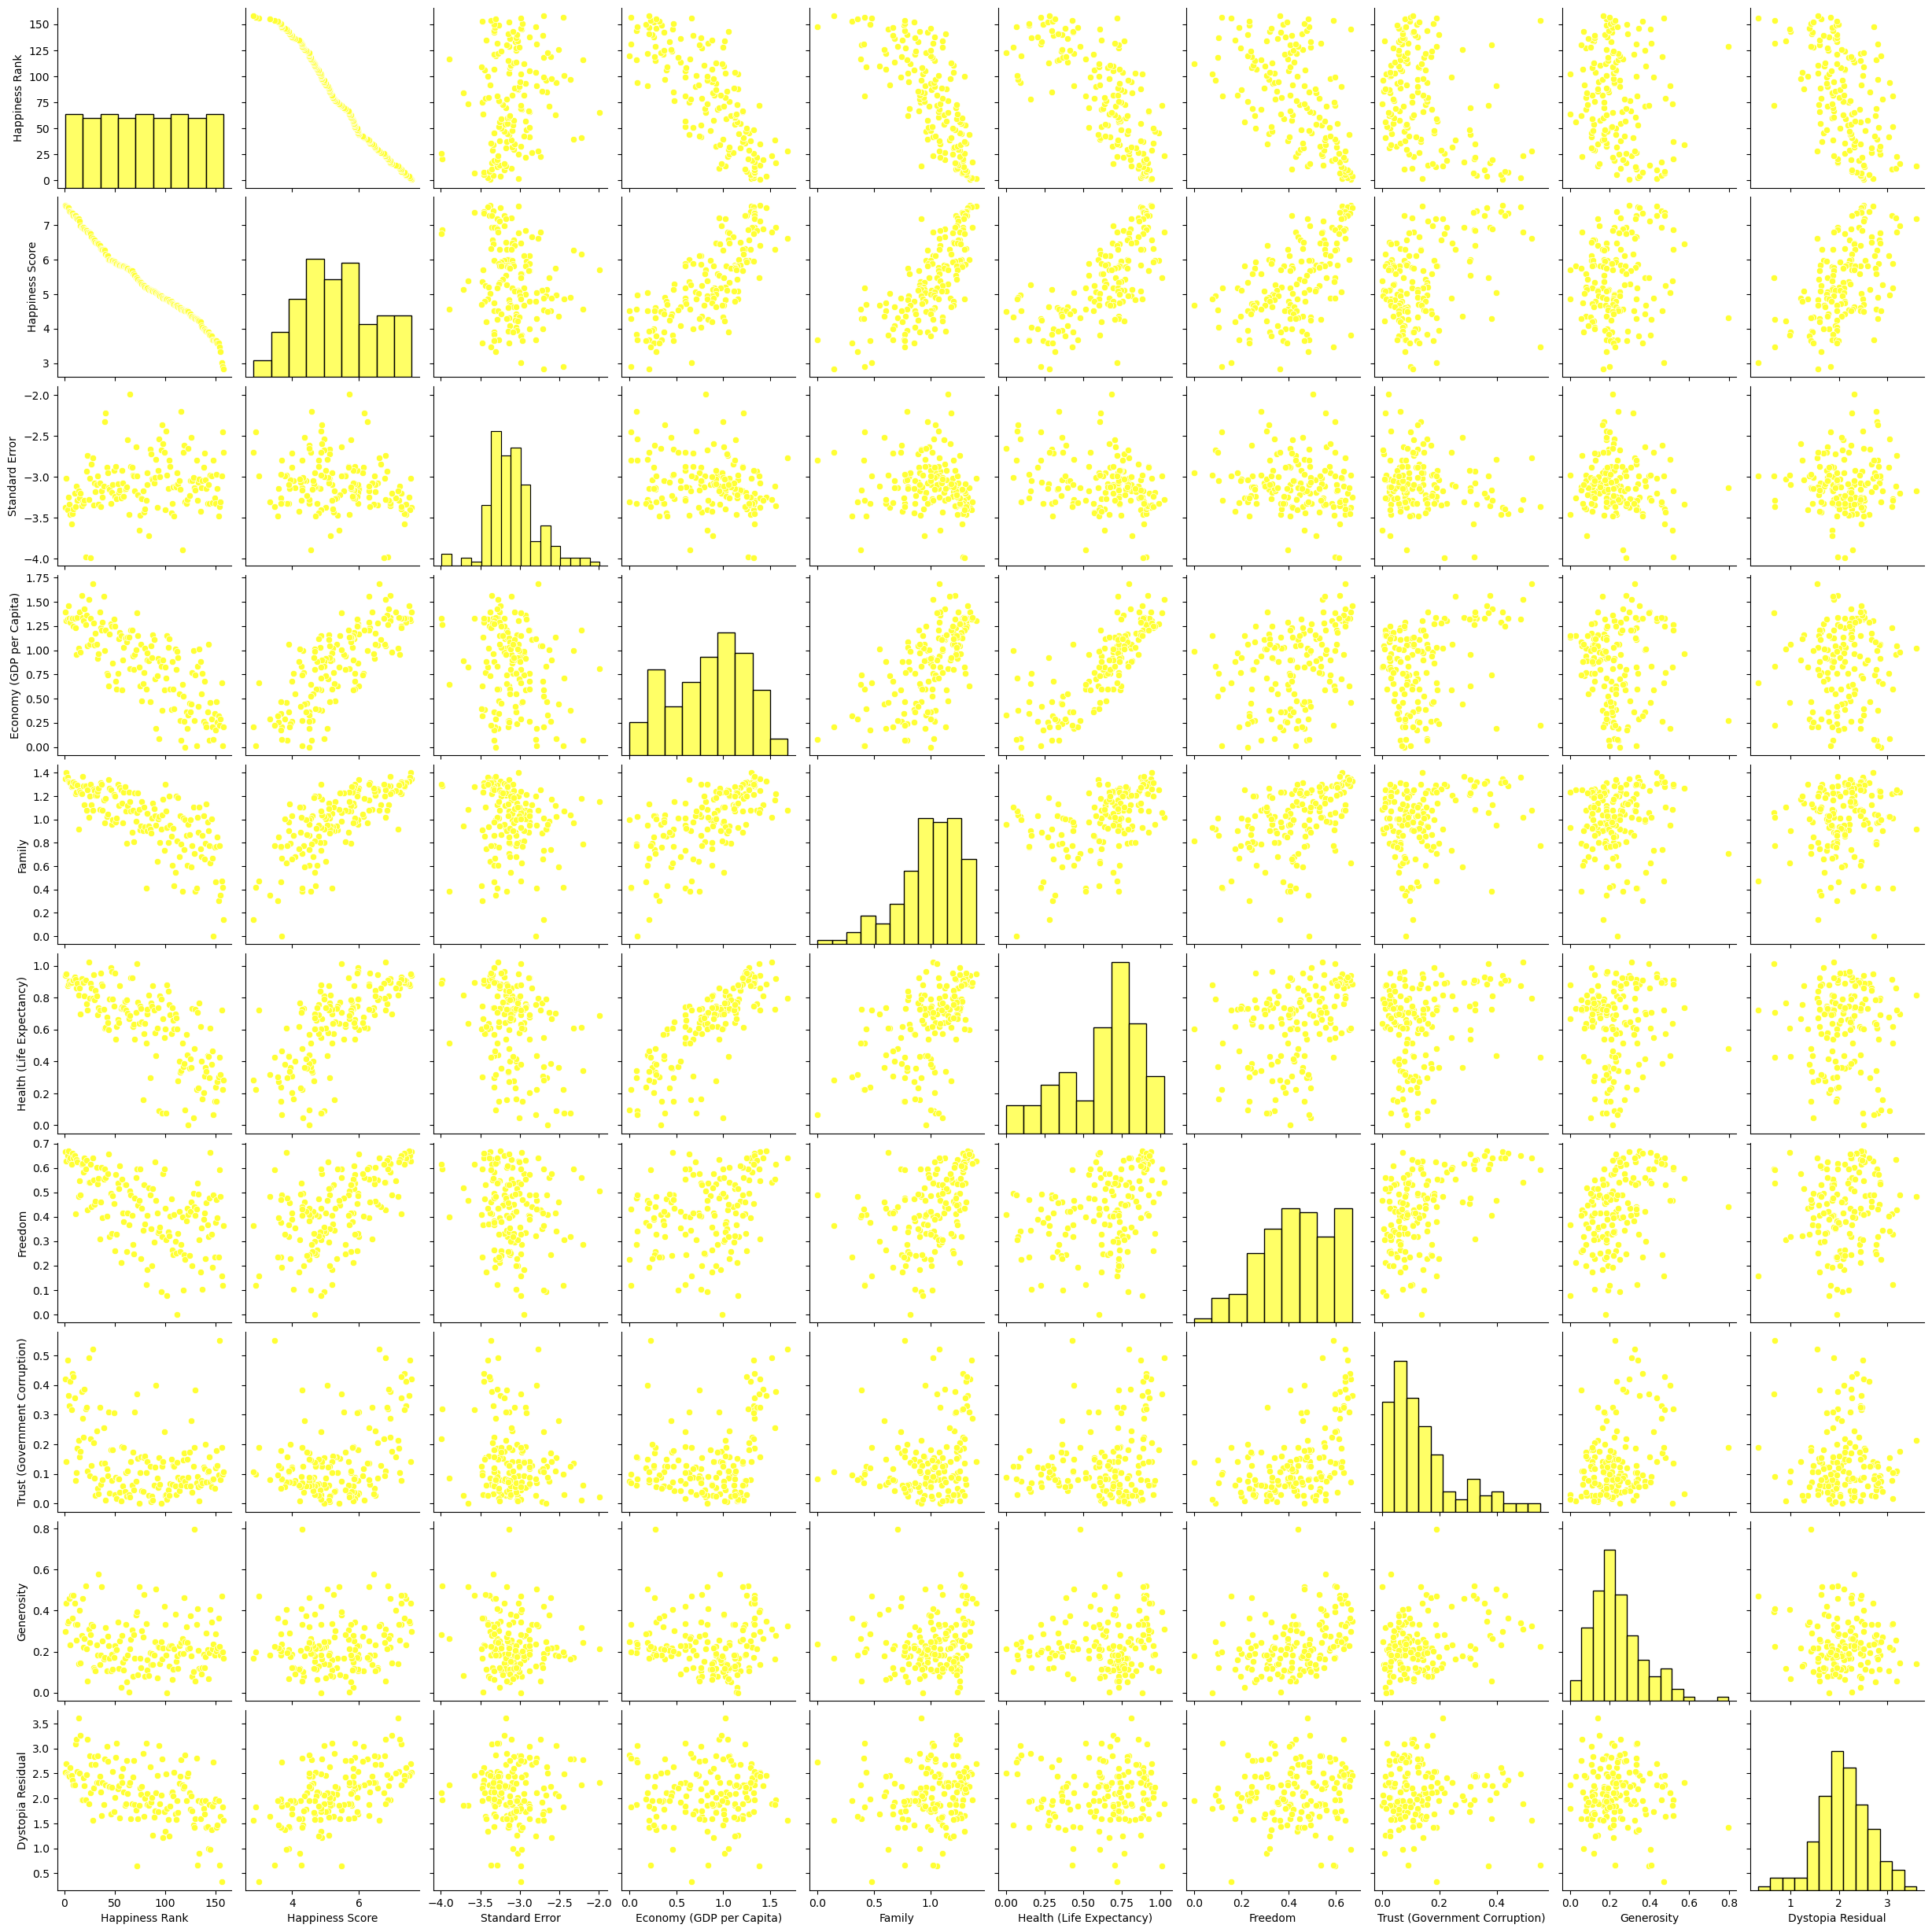

In [13]:
print(data.columns)
sns.pairplot(data)
plt.show()

In [14]:
correlation_matrix = data.corr()
print(correlation_matrix['Happiness Score'])

Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.210296
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64


C:\Users\Mahima\AppData\Local\Temp\ipykernel_14076\1716444415.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Correlation between 'Region_encoded' and 'Happiness Score': -0.17679076916503766


C:\Users\Mahima\AppData\Local\Temp\ipykernel_14076\2630003593.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['Happiness Score']], annot=True, cmap= colors)


<Axes: >

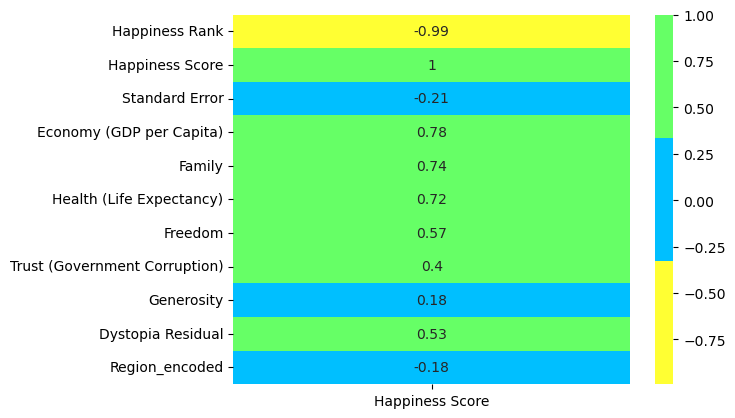

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Region_encoded'] = label_encoder.fit_transform(data['Region'])

# Calculate the correlation between 'Region_encoded' and 'Happiness Score'
correlation = data['Region_encoded'].corr(data['Happiness Score'])

# Display the correlation value
print(f"Correlation between 'Region_encoded' and 'Happiness Score': {correlation}")

# You can also visualize the correlation using a heatmap
colors = ["#FFFF33", "#00BFFF", "#66FF66"] 
sns.heatmap(data.corr()[['Happiness Score']], annot=True, cmap= colors)

In [16]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


-3.275446    2
-3.283148    2
-3.124930 

In [17]:
data.nunique().to_frame('Number of Unique values in the Dataset:')

,Number of Unique values in the Dataset:
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


Given are the value counts and unique values of the dataset.

- First let's see the lowest performers for all respective features.

In [18]:
data.loc[data['Health (Life Expectancy)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
122,Sierra Leone,Sub-Saharan Africa,123,4.507,-2.649593,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009,8


In [19]:
data.loc[data['Economy (GDP per Capita)'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,-3.302257,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712,8


In [20]:
data.loc[data['Freedom'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
111,Iraq,Middle East and Northern Africa,112,4.677,-2.950377,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335,4


In [21]:
data.loc[data['Family'] ==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
147,Central African Republic,Sub-Saharan Africa,148,3.678,-2.794916,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223,8


In [22]:
data.loc[data['Trust (Government Corruption)']==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
73,Indonesia,Southeastern Asia,74,5.399,-3.651198,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399,6


From the above study we can see the minimum performers foe respective features are:

- Health (Life Expectancy) -__Sierra Leone__
- Economy (GDP per Capita)- __Congo (Kinshasa)__
- Freedom -__Iraq__
- Family -__Central African Republic__
- Trust (Government Corruption) -__Indonesia__

### <font color="blue">Top 10 Countries based on Happiness</font>

In [23]:
T10 = data.sort_values(by='Happiness Score', ascending= False).head(10)
T10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
0,Switzerland,Western Europe,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9
1,Iceland,Western Europe,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9
2,Denmark,Western Europe,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9
3,Norway,Western Europe,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9
4,Canada,North America,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5
5,Finland,Western Europe,6,7.406,-3.460947,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,9
6,Netherlands,Western Europe,7,7.378,-3.575908,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,9
7,Sweden,Western Europe,8,7.364,-3.455548,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,9
8,New Zealand,Australia and New Zealand,9,7.286,-3.389961,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,0
9,Australia,Australia and New Zealand,10,7.284,-3.198338,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,0


The Top Performer is __Switzerland__ with highest Happiness_Score of __7.587__ and __7__ out of __10__ countries are from __Western Europe__.

### <font color="blue">Bottom 10 Countries based on Happiness</font>

In [24]:
B10 =data.sort_values(by='Happiness Score', ascending=True).head(10)
B10

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Region_encoded
157,Togo,Sub-Saharan Africa,158,2.839,-2.699041,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,8
156,Burundi,Sub-Saharan Africa,157,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,8
155,Syria,Middle East and Northern Africa,156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,4
154,Benin,Sub-Saharan Africa,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,8
153,Rwanda,Sub-Saharan Africa,154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,8
152,Afghanistan,Southern Asia,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,7
151,Burkina Faso,Sub-Saharan Africa,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,8
150,Ivory Coast,Sub-Saharan Africa,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,8
149,Guinea,Sub-Saharan Africa,150,3.656,-3.327018,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172,8
148,Chad,Sub-Saharan Africa,149,3.667,-3.262305,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296,8


The Least Performer is __Chad__ with lowest Happiness_Score of __3.667__ and __8__ out of __10__ countries are from Sub-Saharan Africa.

In [25]:
Desc_Region=data.groupby('Region')
Desc_Region['Happiness Score'].describe().sort_values(by='mean', ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


___Regional Happiness Analysis: Understanding Variances and Key Findings___

- "Australia and New Zealand" is the happiest region with a Happiness Score of 7.2850.
- "North America" and "Western Europe" are among the top regions.
- "Sub-Saharan Africa" is the least happy region with a Happiness Score of 4.2028.
- "Southern Asia" and "Southeastern Asia" have lower Happiness Scores.
- Significant variation in Happiness Scores among regions.
- Regional differences highlight the role of unique cultural and socioeconomic factors.

let's analyse which features contributes to the happiness and make a ML model for the same.

### <font color="orange"> 4.Machine Learning</font>

In [26]:
# firstly lets create a new df containing numetic columns for analysis.
df = data_copy[data_copy.columns[3:]]
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
df.shape

(158, 9)

In [28]:
X=df.drop(columns =['Happiness Score'])
Y=df['Happiness Score']

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('X Train size:',X_train.shape)
print('Y Train size:',Y_train.shape)
print('X Test size:',X_test.shape)
print('Y Test size:',Y_test.shape)

X Train size: (105, 8)
Y Train size: (105,)
X Test size: (53, 8)
Y Test size: (53,)


In [30]:
maxR2_score = 0
maxRS = 0
r2_scores = []

for i in range(1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)
    y_pred = lin_reg.predict(X_test)
    R2 = r2_score(Y_test, y_pred)
    
    r2_scores.append(R2)

maxR2_score = max(r2_scores)
maxRS = r2_scores.index(maxR2_score) + 1

print('Best accuracy is', maxR2_score, 'on Random_state', maxRS)

Best accuracy is 0.999999955318454 on Random_state 148


In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
train_score = lin_reg.score(X_train, Y_train)
print('R-squared score on training data:', train_score)

y_pred = lin_reg.predict(X_test)

print('Predicted prices:\n', y_pred)
print('\nActual prices:\n', Y_test)

R-squared score on training data: 0.9999999433955269
Predicted prices:
 [5.12893674 2.83892475 5.14041831 4.97119543 3.68084805 6.50509134
 7.18726602 4.86729094 5.88899564 5.87833857 3.89655843 4.78791387
 6.48511438 7.52700505 5.05721097 4.51712649 5.10168408 5.60465467
 4.95932412 6.85295382 5.75857151 3.98886912 6.41115363 5.19368894
 5.25283105 4.29661603 5.71592754 5.79063541 4.6334862  5.85525854
 5.77042029 4.68551689 3.93086899 4.34996032 5.98369791 4.30690231
 6.26928047 4.94867322 4.874293   3.65515365 5.98705664 4.64241082
 6.29482019 3.6559317  5.00702682 5.94815324 5.12416509 6.79767847
 5.33247173 7.22570006 3.58692012 6.90133874 6.45466224]

Actual prices:
 84     5.129
157    2.839
83     5.140
93     4.971
146    3.681
30     6.505
13     7.187
100    4.867
51     5.889
52     5.878
142    3.896
104    4.788
31     6.485
2      7.527
90     5.057
119    4.517
87     5.102
67     5.605
94     4.959
21     6.853
61     5.759
138    3.989
34     6.411
80     5.194
78    

In [32]:
# ML Models evaluation
rf = RandomForestRegressor(n_estimators=100)
svr = SVR()
dtc = DecisionTreeRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()
lr = LinearRegression()  

models = [rf, svr, dtc, ad, gb, lr]  
for m in models:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)
    
    print('\033[1m' + ' Error of', m, ':' + '\033[0m')
    print('Mean absolute error:', mean_absolute_error(Y_test, y_pred))
    print('Mean squared error:', mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
    print('\n')

    print('\033[1m' + ' R2 Score :' + '\033[0m')
    r2 = r2_score(Y_test, y_pred)
    print(r2)
    print('\n')

 Error of RandomForestRegressor() :
Mean absolute error: 0.3243767924528304
Mean squared error: 0.16508908762452834
Root Mean Squared Error: 0.4063115647191553


 R2 Score :
0.8509253775096336


 Error of SVR() :
Mean absolute error: 0.08286553219790395
Mean squared error: 0.015959416025641736
Root Mean Squared Error: 0.1263305823054803


 R2 Score :
0.9855887269508674


 Error of DecisionTreeRegressor() :
Mean absolute error: 0.4471698113207548
Mean squared error: 0.33430690566037735
Root Mean Squared Error: 0.5781927928125509


 R2 Score :
0.6981225320562088


 Error of AdaBoostRegressor() :
Mean absolute error: 0.37486741747237434
Mean squared error: 0.23446744860051616
Root Mean Squared Error: 0.48421838936632317


 R2 Score :
0.7882770636791131


 Error of GradientBoostingRegressor() :
Mean absolute error: 0.23933652198426908
Mean squared error: 0.11603022345620091
Root Mean Squared Error: 0.340632093990277


 R2 Score :
0.8952252870974371


 Error of LinearRegression() :
Mean abs

In [33]:
model_results = {
    'Model': [],
    'Mean Absolute Error': [],
    'Mean Squared Error': [],
    'Root Mean Squared Error': [],
    'R2 Score': []
}

rf = RandomForestRegressor(n_estimators=100)
svr = SVR()
dtc = DecisionTreeRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()
lr = LinearRegression()

models = [rf, svr, dtc, ad, gb, lr]

for m in models:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)

    model_results['Model'].append(str(m))
    model_results['Mean Absolute Error'].append(mean_absolute_error(Y_test, y_pred))
    model_results['Mean Squared Error'].append(mean_squared_error(Y_test, y_pred))
    model_results['Root Mean Squared Error'].append(np.sqrt(mean_squared_error(Y_test, y_pred)))
    model_results['R2 Score'].append(r2_score(Y_test, y_pred))


results_df = pd.DataFrame(model_results)
results_df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
0,RandomForestRegressor(),0.352398,1.976033e-01,0.444526,0.821565
1,SVR(),0.082866,1.595942e-02,0.126331,0.985589
2,DecisionTreeRegressor(),0.371170,2.104743e-01,0.458775,0.809943
3,AdaBoostRegressor(),0.362589,2.224484e-01,0.471644,0.799130
4,GradientBoostingRegressor(),0.240424,1.155121e-01,0.339871,0.895693
5,LinearRegression(),0.000231,7.392351e-08,0.000272,1.000000


In [34]:
# Cross validation using R2 score
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring="r2")  # Change scoring to R-squared
    mean_score = scores.mean()
    std_score = scores.std()
    
    print(f"\033[1m{name} Metrics (Cross-Validation):\033[0m")
    print(f"Mean R2 Score: {mean_score}")
    print(f"Standard Deviation R2 Score: {std_score}")
    print("\n")

Random Forest Metrics (Cross-Validation):
Mean R2 Score: -3.2398673299643845
Standard Deviation R2 Score: 2.58623097529197


Support Vector Regression Metrics (Cross-Validation):
Mean R2 Score: 0.029077690828498603
Standard Deviation R2 Score: 0.9301639897307148


Decision Tree Metrics (Cross-Validation):
Mean R2 Score: -7.1332357910148705
Standard Deviation R2 Score: 1.9863755996232209


AdaBoost Metrics (Cross-Validation):
Mean R2 Score: -6.453920580337714
Standard Deviation R2 Score: 2.062113583017526


Gradient Boosting Metrics (Cross-Validation):
Mean R2 Score: -2.2779107057051937
Standard Deviation R2 Score: 1.086553788494787


Linear Regression Metrics (Cross-Validation):
Mean R2 Score: 0.9999981871007761
Standard Deviation R2 Score: 1.4991023001111373e-06




In [35]:
# Cross validation using RSME
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    
    print(f"\033[1m{name} Metrics (Cross-Validation):\033[0m")
    print(f"Mean RMSE: {rmse_scores.mean()}")
    print(f"Standard Deviation RMSE: {rmse_scores.std()}")
    print("\n")

Random Forest Metrics (Cross-Validation):
Mean RMSE: 0.5772071473340873
Standard Deviation RMSE: 0.34285351045412893


Support Vector Regression Metrics (Cross-Validation):
Mean RMSE: 0.2665186012450442
Standard Deviation RMSE: 0.21676832339955204


Decision Tree Metrics (Cross-Validation):
Mean RMSE: 0.7409086687684692
Standard Deviation RMSE: 0.17126678922698926


AdaBoost Metrics (Cross-Validation):
Mean RMSE: 0.7039017233309972
Standard Deviation RMSE: 0.2901301905390923


Gradient Boosting Metrics (Cross-Validation):
Mean RMSE: 0.502766415364744
Standard Deviation RMSE: 0.2420346523628963


Linear Regression Metrics (Cross-Validation):
Mean RMSE: 0.00029454562636877115
Standard Deviation RMSE: 3.231035360997856e-05




In [36]:
linear_regression_results = results_df[results_df['Model'] == "LinearRegression()"]
linear_regression_results

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
5,LinearRegression(),0.000231,7.392351e-08,0.000272,1.0


In [37]:
cross_val_scores_rmse_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Cross-Validation RSME Mean': [0.00029454562636877115],  
    'Cross-Validation RSME Std': [3.231035360997856e-05]  
})

cross_val_scores_r2_df = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Cross-Validation R2 Mean': [ 0.9999981871007761],  
    'Cross-Validation R2 Std': [1.4991023001111373e-06]  
})

linear_regression_summary_df = pd.DataFrame(linear_regression_results)
linear_regression_summary_df = pd.concat([linear_regression_summary_df, cross_val_scores_rmse_df, cross_val_scores_r2_df], axis=1)
linear_regression_summary_df

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Model,Cross-Validation RSME Mean,Cross-Validation RSME Std,Model,Cross-Validation R2 Mean,Cross-Validation R2 Std
5,LinearRegression(),0.000231,7.392351e-08,0.000272,1.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,Linear Regression,0.000295,0.000032,Linear Regression,0.999998,0.000001


With the Highest R2 Score and lowest RSME Score we have Linear Regression as our best Model to Predict the Happiness.

### <font color="orange">5.Feature Importance</font>

Top 10 Important Features:
                         Feature  Coefficient
1       Economy (GDP per Capita)     1.000152
2                         Family     1.000072
7              Dystopia Residual     1.000019
6                     Generosity     0.999930
5  Trust (Government Corruption)     0.999879
4                        Freedom     0.999804
3       Health (Life Expectancy)     0.999661
0                 Standard Error    -0.000262


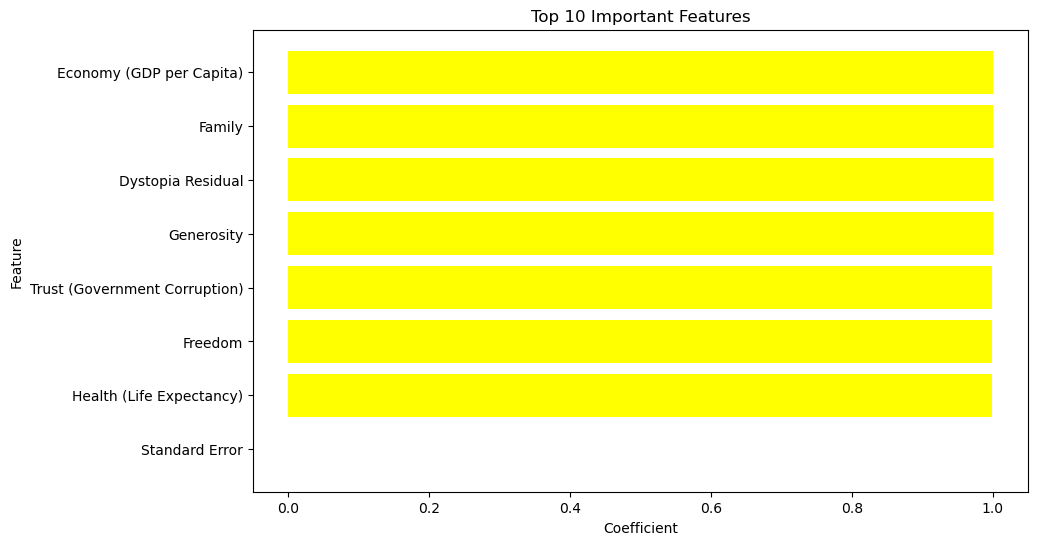

In [38]:
feature_importance = lr.coef_
feature_importance_dict = {feature: coef for feature, coef in zip(X.columns, feature_importance)}
feature_importance_df = pd.DataFrame({'Feature': feature_importance_dict.keys(), 'Coefficient': feature_importance_dict.values()})

feature_importance_df = feature_importance_df.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

# Visulization
N = 10
print("Top {} Important Features:".format(N))
print(feature_importance_df.head(N))

colors = ['yellow' if coef > 0 else 'lightyellow' for coef in feature_importance_df['Coefficient']]
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][::-1][:N], feature_importance_df['Coefficient'][::-1][:N], color=colors[::-1][:N])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top {} Important Features'.format(N))
plt.show()

These are the top to bottom most affecting features in predecting Happiness, we will see details in the Conclusion.

In [39]:
#Saving Model
import joblib
joblib.dump(lin_reg,'lin_reg.obj')

['lin_reg.obj']

### <font color="orange">6.Conclusion</font>

## Best Model :- Linear Regression

Based on the provided model evaluation and cross-validation results, it can be concluded that the __Linear Regression model is the best model for the task of predicting the Happiness Score or Rank.__ 

Let's understand why:

1. Linear Regression Model Evaluation:

 > The Linear Regression model achieved impressive results in the evaluation metrics:

 >- Mean Absolute Error (MAE): 0.000231
 >- Mean Squared Error (MSE): 7.392351e-08
 >- Root Mean Squared Error (RMSE): 0.000272
 >- R-squared (R2) Score: 1.0
   
These metrics suggest that the Linear Regression model can predict the Happiness Score or Rank with very high accuracy, as indicated by the close-to-zero errors and a perfect R2 score of 1.0.

2. Cross-Validation Results:

 > In cross-validation, which assesses the model's generalization performance, the Linear Regression model also performed     
   exceptionally well:
   
 >- Mean R2 Score: 0.999998
 >- Standard Deviation of R2 Score: 0.000001
 >- Mean RMSE: 0.000295
 >- Standard Deviation of RMSE: 0.000032
  
The consistent high R2 scores and the low RMSE values in cross-validation demonstrate that the Linear Regression model's strong performance is not due to overfitting and that it generalizes well to unseen data.

___In summary, the Linear Regression model has shown remarkable predictive power, with both evaluation and cross-validation results indicating its exceptional performance. It is a reliable model for predicting the Happiness Score or Rank, providing accurate and consistent results. Therefore, it is the best model for this particular task.___

## Best Features:-

__From the analysis based on the feature coefficients from the linear regression model, we can determine the most affecting features as follows:__

1. Economy (GDP per Capita): This feature has the highest positive coefficient (1.000152), making it the most influential factor in predicting happiness scores. An increase in GDP per capita is strongly associated with higher happiness scores.

2. Family: With the second-highest positive coefficient (1.000072), family support is the second most important feature in predicting happiness. Stronger family bonds contribute significantly to happiness.

3. Dystopia Residual: This comes in as the third most important feature with a positive coefficient (1.000019), contributing positively to happiness scores. However, remember that Dystopia represents the world's least-happy people, so it's a benchmark for comparison.

4. Generosity: With a positive coefficient (0.999930), generosity is the fourth most affecting feature. More generous societies tend to have higher happiness scores.

5. Trust (Government Corruption): Lower government corruption levels are the fifth most important factor, with a positive coefficient (0.999879). Reduced corruption contributes to higher happiness.

6. Freedom: Personal freedom ranks as the sixth most important feature, with a positive coefficient (0.999804). More freedom is associated with increased happiness.

7. Health (Life Expectancy): Better health and life expectancy are the seventh most affecting features, with a positive coefficient (0.999661). Improved health contributes to higher happiness.

8. Standard Error: While having a negative coefficient (-0.000262), it is the least affecting feature among all. The coefficient is very close to zero, indicating that this feature doesn't have a strong impact on happiness scores.

The top features with positive coefficients positively affect happiness, while the feature with a negative coefficient has a minimal impact.

<h1 style="background: linear-gradient(135deg, #FFEDC6,#FFFF33); -webkit-background-clip: text; -webkit-text-fill-color: transparent; font-family: 'Georgia', serif; font-weight: bold; text-align: center; color: blue;">Thankyou :)</h1>